# Init

In [67]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Inputs

In [68]:
#import the AOI
AOI_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
AOI_file = 'MUM_LIM_BoundingBox_AOI_A.shp'
AOI_gdf = gpd.read_file(AOI_path / AOI_file)

In [69]:

#import file to be clipped
to_clip_path = Path(r'D:\\Dropbox\\x\\_data\\WD HydroAtlas\\')
to_clip_file = 'HydroRIVERS_v10_as.shp'
to_clip_gdf = gpd.read_file(to_clip_path / to_clip_file)

# Edit

In [70]:
#read the AOI CRS
AOI_crs = AOI_gdf.crs

#set the CRS of the file to be clipped to the AOI CRS
to_clip_gdf.to_crs(AOI_crs, inplace=True)
if to_clip_gdf.crs == AOI_gdf.crs:
    print('Same CRS', to_clip_gdf.crs)
else:
    print('Different CRS')

Same CRS EPSG:32643


In [71]:
#get the AOI boundary coordinates, avoiding any complexities from polygons in the input feature
df_boundary_list = AOI_gdf['geometry'].bounds.values.tolist()[0]
df_boundary_list

[261090.01349122357, 2087528.8102898337, 310676.98093838897, 2158122.589804208]

In [72]:
#clip the file to the AOI
clipped_gdf = gpd.clip(to_clip_gdf, mask=df_boundary_list, keep_geom_type=True)
clipped_gdf.shape

(629, 15)

<Axes: >

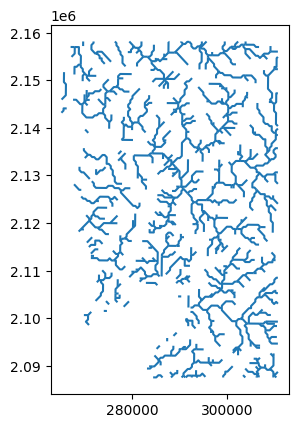

In [73]:
clipped_gdf.plot()

# Export

In [75]:
#export the clipped file as geopackage
export_path = AOI_path
export_file = 'MUM_HYD_HydroRivers_v10_L.gpkg'

clipped_gdf.to_file(export_path / export_file, driver='GPKG')

In [77]:
#export the clipped file as shapefile
export_path = AOI_path
export_file = 'MUM_HYD_HydroRivers_v10_L.shp'

clipped_gdf.to_file(export_path / export_file, driver='ESRI Shapefile')